# Online Retails Purchase

### Introduction:



### Step 1. Import the necessary libraries

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/Visualization/Online_Retail/Online_Retail.csv). 

### Step 3. Assign it to a variable called online_rt

In [6]:
online_rt = pd.read_csv('Online_Retail.csv', encoding='ISO-8859-1')

In [7]:
online_rt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


### Step 4. Create a histogram with the 10 countries that have the most 'Quantity' ordered except UK

In [10]:
grouped = online_rt.groupby('Country')['Quantity'].sum().sort_values(ascending=False).to_frame()
grouped

,Quantity
Country,
United Kingdom,4263829
Netherlands,200128
EIRE,142637
Germany,117448
France,110480
Australia,83653
Sweden,35637
Switzerland,30325
Spain,26824


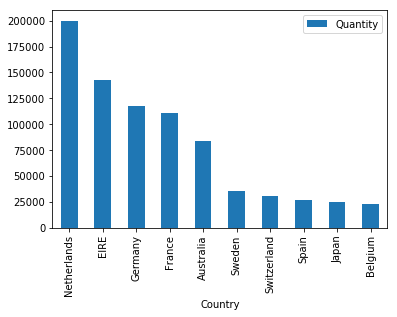

In [11]:
grouped[1:11].plot(kind='bar')

### Step 5.  Exclude negative Quatity entries

In [17]:
no_negatives = online_rt[online_rt['Quantity'] >= 0]
groups_nn = no_negatives.groupby('Country')['Quantity'].sum().sort_values(ascending=False).to_frame()

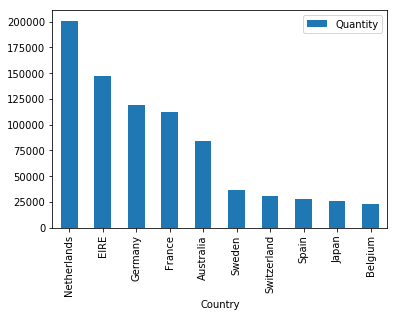

In [19]:
groups_nn[1:11].plot(kind='bar')

### Step 6. Create a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries

In [39]:
three = no_negatives[(no_negatives['Country'] == 'Netherlands') | 
                     (no_negatives['Country'] == 'EIRE') | 
                     (no_negatives['Country'] == 'Germany')]

three_grouped = three.groupby(['Country','CustomerID']).sum()
three_grouped['country'] = three_grouped.index.get_level_values(0)
three_grouped = three_grouped.sort_values(by=['country', 'Quantity'], ascending=[False,False])

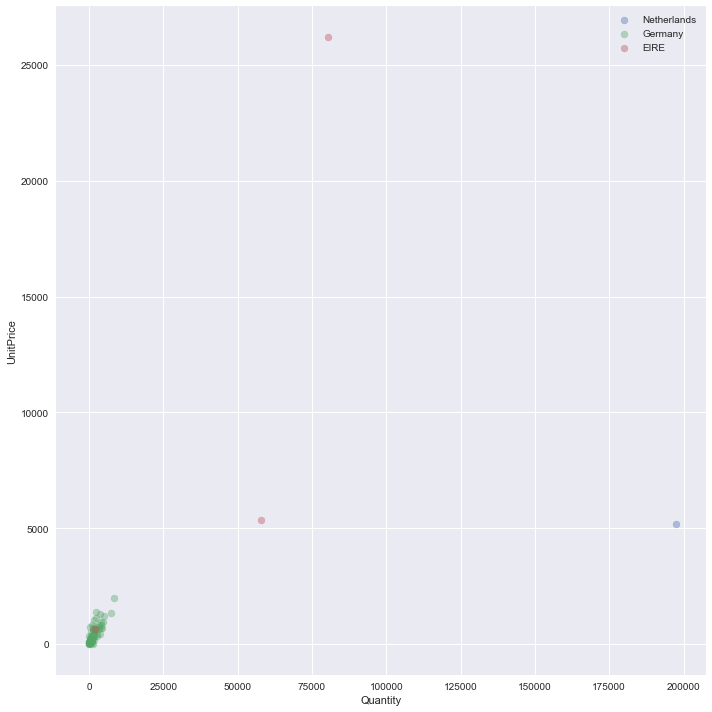

In [56]:
g = sns.FacetGrid(three_grouped, hue="country", size=10)
g.map(plt.scatter, "Quantity", "UnitPrice", alpha=.4)
plt.legend()

### BONUS: Create your own question and answer it.